# Figure. Rare Variants

In [5]:
import copy
import os
import subprocess

import cdpybio as cpb
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

import ciepy
import cardipspy as cpy

%matplotlib inline
%load_ext rpy2.ipython

dy_name = 'figure_rare_variants'
    
outdir = os.path.join(ciepy.root, 'output', dy_name)
cpy.makedir(outdir)

private_outdir = os.path.join(ciepy.root, 'private_output', dy_name)
cpy.makedir(private_outdir)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
sns.set_style('whitegrid')

In [3]:
fn = os.path.join(ciepy.root, 'private_output', 'rare_variant_analysis', 'all_rare_variants_info.tsv')
rare_info = pd.read_table(fn, index_col=0)
fn = os.path.join(ciepy.root, 'private_output', 'rare_variant_analysis', 'all_not_rare_variants_info.tsv.gz')
not_rare_info = pd.read_table(fn, index_col=0)

fn = os.path.join(ciepy.root, 'private_output', 'rare_variant_analysis', 'cnv_rare_variants_info.tsv')
cnv_rare_info = pd.read_table(fn, index_col=0)
fn = os.path.join(ciepy.root, 'private_output', 'rare_variant_analysis', 'cnv_not_rare_variants_info.tsv')
cnv_not_rare_info = pd.read_table(fn, index_col=0)

In [6]:
m = np.floor(rare_info.exp.min())
pdfs = pd.DataFrame(index=np.arange(m, abs(m) + 0.1, 0.1))
density = scipy.stats.gaussian_kde(rare_info.exp)
pdfs['rare'] = density(pdfs.index)
density = scipy.stats.gaussian_kde(not_rare_info.exp)
pdfs['not_rare'] = density(pdfs.index)

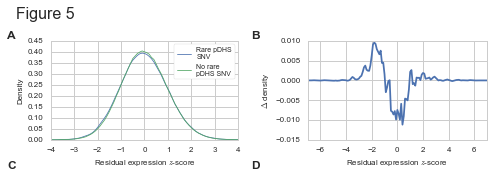

In [21]:
fig = plt.figure(figsize=(6.85, 4.5), dpi=300)

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
ax.text(0, 0, 'Figure 5',
        size=16, va='bottom')
ciepy.clean_axis(ax)
ax.set_xticks([])
ax.set_yticks([])
gs.tight_layout(fig, rect=[0, 0.90, 0.5, 1])

# Rare promoter DHS SNVs.
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])

pdfs.rare.plot(label='Rare pDHS\nSNV', ax=ax, linewidth=0.8)
pdfs.not_rare.plot(label='No rare\npDHS SNV', ax=ax, linewidth=0.8)
ax.legend(fontsize=7, frameon=True, fancybox=True)
ax.set_xlim(-4, 4)
ax.set_ylabel('Density', fontsize=8)
ax.set_xlabel('Residual expression $z$-score', fontsize=8)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
gs.tight_layout(fig, rect=[0, 0.45, 0.5, 0.92])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
(pdfs.rare - pdfs.not_rare).plot(ax=ax)
ax.set_ylabel('$\Delta$ density', fontsize=8)
ax.set_xlabel('Residual expression $z$-score', fontsize=8)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(8)
gs.tight_layout(fig, rect=[0.5, 0.45, 1, 0.92])

t = fig.text(0.005, 0.88, 'A', weight='bold', 
             size=12)
t = fig.text(0.5, 0.88, 'B', weight='bold', 
             size=12)
t = fig.text(0.005, 0.48, 'C', weight='bold', 
             size=12)
t = fig.text(0.5, 0.48, 'D', weight='bold', 
             size=12)

plt.savefig(os.path.join(outdir, 'rare_variants.pdf'));

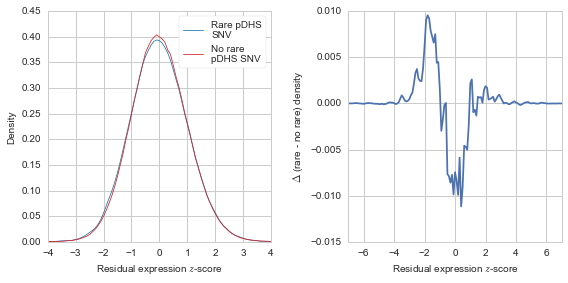

In [67]:
fig = plt.figure(figsize=(8, 4), dpi=300)

# Rare promoter DHS SNVs.
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])

pdfs.rare.plot(label='Rare pDHS\nSNV', ax=ax, linewidth=0.8, color=cpb.analysis.tableau20[0])
pdfs.not_rare.plot(label='No rare\npDHS SNV', ax=ax, linewidth=0.8, color=cpb.analysis.tableau20[6])
ax.legend(fontsize=10, frameon=True, fancybox=True)
ax.set_xlim(-4, 4)
ax.set_ylabel('Density', fontsize=10)
ax.set_xlabel('Residual expression $z$-score', fontsize=10)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(10)
gs.tight_layout(fig, rect=[0, 0, 0.5, 1])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
(pdfs.rare - pdfs.not_rare).plot(ax=ax)
ax.set_ylabel('$\Delta$ (rare - no rare) density', fontsize=10)
ax.set_xlabel('Residual expression $z$-score', fontsize=10)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(10)
gs.tight_layout(fig, rect=[0.5, 0, 1, 1])

plt.savefig(os.path.join(outdir, 'rare_promoter_dhs_snvs_presentation.pdf'));

In [50]:
r = cnv_rare_info[(cnv_rare_info.svtype == 'DEL') & (cnv_rare_info.overlaps_exon)]
nr = cnv_not_rare_info[cnv_not_rare_info.name.apply(lambda x: x in r.name.values)]
m = -6
del_pdfs = pd.DataFrame(index=np.arange(m, abs(m) + 0.1, 0.1))
density = scipy.stats.gaussian_kde(r.exp)
del_pdfs['rare'] = density(del_pdfs.index)
density = scipy.stats.gaussian_kde(nr.exp)
del_pdfs['not_rare'] = density(del_pdfs.index)

In [51]:
r = cnv_rare_info[cnv_rare_info.svtype == 'DUP']
nr = cnv_not_rare_info[cnv_not_rare_info.name.apply(lambda x: x in r.name.values)]
m = -6
dup_pdfs = pd.DataFrame(index=np.arange(m, abs(m) + 0.1, 0.1))
density = scipy.stats.gaussian_kde(r.exp)
dup_pdfs['rare'] = density(dup_pdfs.index)
density = scipy.stats.gaussian_kde(nr.exp)
dup_pdfs['not_rare'] = density(dup_pdfs.index)

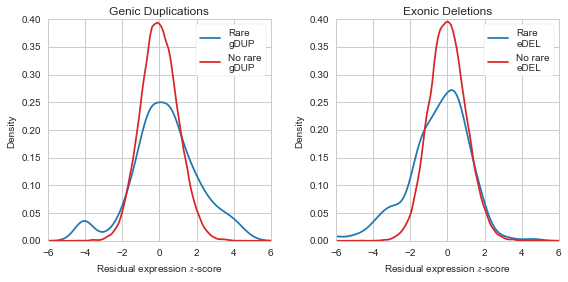

In [69]:
fig = plt.figure(figsize=(8, 4), dpi=300)

# Rare promoter DHS SNVs.
gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])

del_pdfs.rare.plot(label='Rare\neDEL', ax=ax, color=cpb.analysis.tableau20[0])
del_pdfs.not_rare.plot(label='No rare\neDEL', ax=ax, color=cpb.analysis.tableau20[6])
ax.legend(fontsize=10, frameon=True, fancybox=True)
ax.set_xlim(-6, 6)
ax.set_title('Exonic Deletions')
ax.set_ylabel('Density', fontsize=10)
ax.set_xlabel('Residual expression $z$-score', fontsize=10)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(10)
gs.tight_layout(fig, rect=[0.5, 0, 1, 1])

gs = gridspec.GridSpec(1, 1)
ax = fig.add_subplot(gs[0, 0])
dup_pdfs.rare.plot(label='Rare\ngDUP', ax=ax, color=cpb.analysis.tableau20[0])
dup_pdfs.not_rare.plot(label='No rare\ngDUP', ax=ax, color=cpb.analysis.tableau20[6])
ax.legend(fontsize=10, frameon=True, fancybox=True)
ax.set_xlim(-6, 6)
ax.set_title('Genic Duplications')
ax.set_ylabel('Density', fontsize=10)
ax.set_xlabel('Residual expression $z$-score', fontsize=10)
for t in ax.get_xticklabels() + ax.get_yticklabels():
    t.set_fontsize(10)
gs.tight_layout(fig, rect=[0, 0, 0.5, 1])

plt.savefig(os.path.join(outdir, 'rare_genic_cnvs_presentation.pdf'));